# Visualization

References:

* [https://matplotlib.org/index.html](https://matplotlib.org/index.html)
* [https://pypi.org/project/pandas-datareader/](https://pypi.org/project/pandas-datareader/)

## Matplotlib

* A Python 2D plotting library
* Alternative libraries: [Seaborn](http://seaborn.pydata.org/examples/index.html), [Plotly](https://plot.ly/python/) etc.

In [132]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default')
# plt.style.use('ggplot')

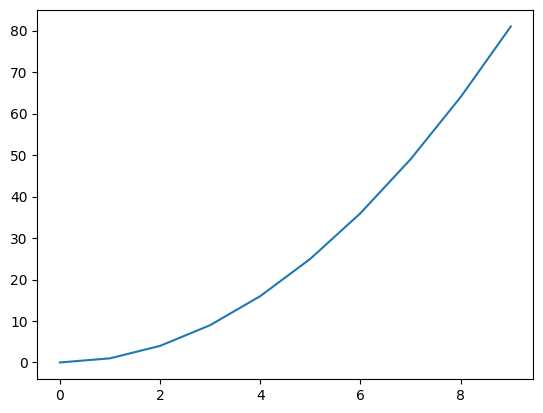

In [133]:
X = np.arange(0, 10)
Y = X ** 2
plt.plot(X, Y)
# plt.plot(X, Y, 'g--')

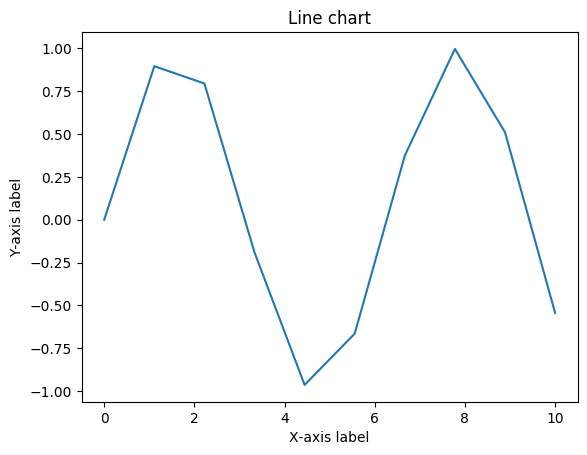

In [134]:
X = np.linspace(0, 10, 10)
Y = np.sin(X)

plt.xlabel("X-axis label")
plt.ylabel("Y-axis label")
plt.title("Line chart")

plt.plot(X, Y)

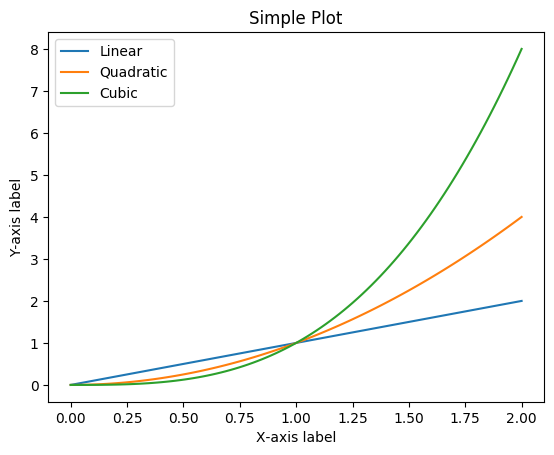

In [135]:
x = np.linspace(0, 2, 100)

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title("Simple Plot")

plt.plot(x, x, label='Linear')
plt.plot(x, x**2, label='Quadratic')
plt.plot(x, x**3, label='Cubic')

plt.legend()

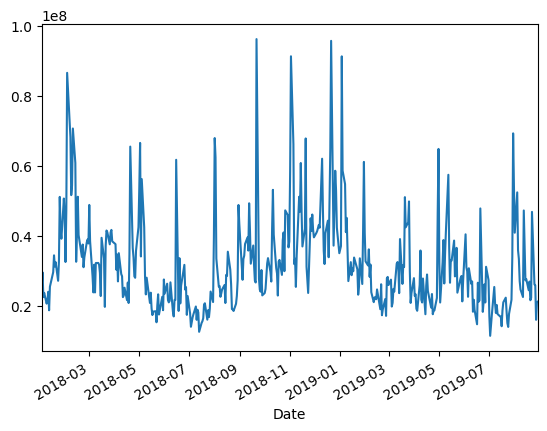

In [136]:
import pandas as pd
from pandas_datareader import data

start_date = '2018-01-01'
end_date = '2019-12-31'

appleStockData = data.DataReader('AAPL', 'yahoo', start_date, end_date)
appleStockData["Volume"].plot()

# appleStockData.plot(y = "Close")

# appleStockData[["High", "Low"]].plot()

188.79229150011886


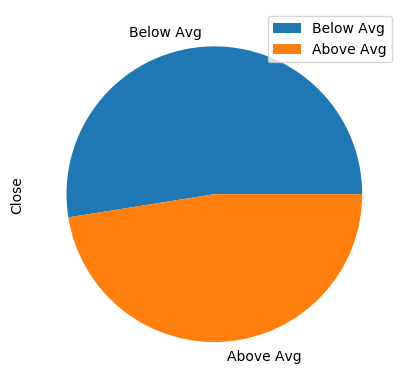

In [137]:
closeColumn = appleStockData["Close"]
avg = closeColumn.mean()
print(avg)

def rank_perf(stockPrice):
    if stockPrice >= avg:
        return "Above Avg"
    else:
        return "Below Avg"

closeColumn.apply(rank_perf).value_counts().plot(kind="pie", legend=True) # line, bar, barh, pie

## Plotly

In [149]:
import plotly.graph_objects as go
import pandas as pd

import io
import requests

dataUrl = "https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv"
s = requests.get(dataUrl).content
z_data = pd.read_csv(io.StringIO(s.decode('utf-8')))

fig = go.Figure(data=[go.Surface(z=z_data.values)])

fig.update_layout(title='Mt. Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()